In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

%matplotlib inline

In [59]:
label_encoder = LabelEncoder()
label_binarizer = LabelBinarizer()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()


## GETTING THE DATA

In [60]:
car_data = pd.read_csv("car_prices.csv")

In [61]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

## Sampling a test set and no data snooping


In [62]:
copy_data= car_data.copy()

In [63]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

## EXPLORING THE DATA

In [64]:
car_data.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,3722.000,3722.000,3663.000,3661.000,788.000,826.000,755.000
mean,4514644.057,2008.146,194984.144,11080.623,5.286,5.157,208.832
std,4297011.880,4.206,139575.514,109112.707,0.801,1.203,70.941
min,550000.000,1979.000,1.000,180.000,2.000,4.000,83.000
25%,2310000.000,2005.000,117394.500,2000.000,5.000,4.000,158.000
50%,3360000.000,2008.000,176290.000,2500.000,5.000,6.000,203.000
75%,5036250.000,2011.000,245381.500,3500.000,5.000,6.000,268.000
max,62400000.000,2022.000,2456318.000,3500000.000,8.000,8.000,585.000


In [65]:
car_data.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.000,1800.000,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.000,3700.000,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.000,3500.000,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.000,6.000,309.000,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.000,4000.000,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.000,3500.000,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


## Histogram of continous data

### Removing outliers

In [66]:
q = car_data['Mileage'].quantile(0.99)
copy_data = copy_data[(copy_data['Mileage']) < q]

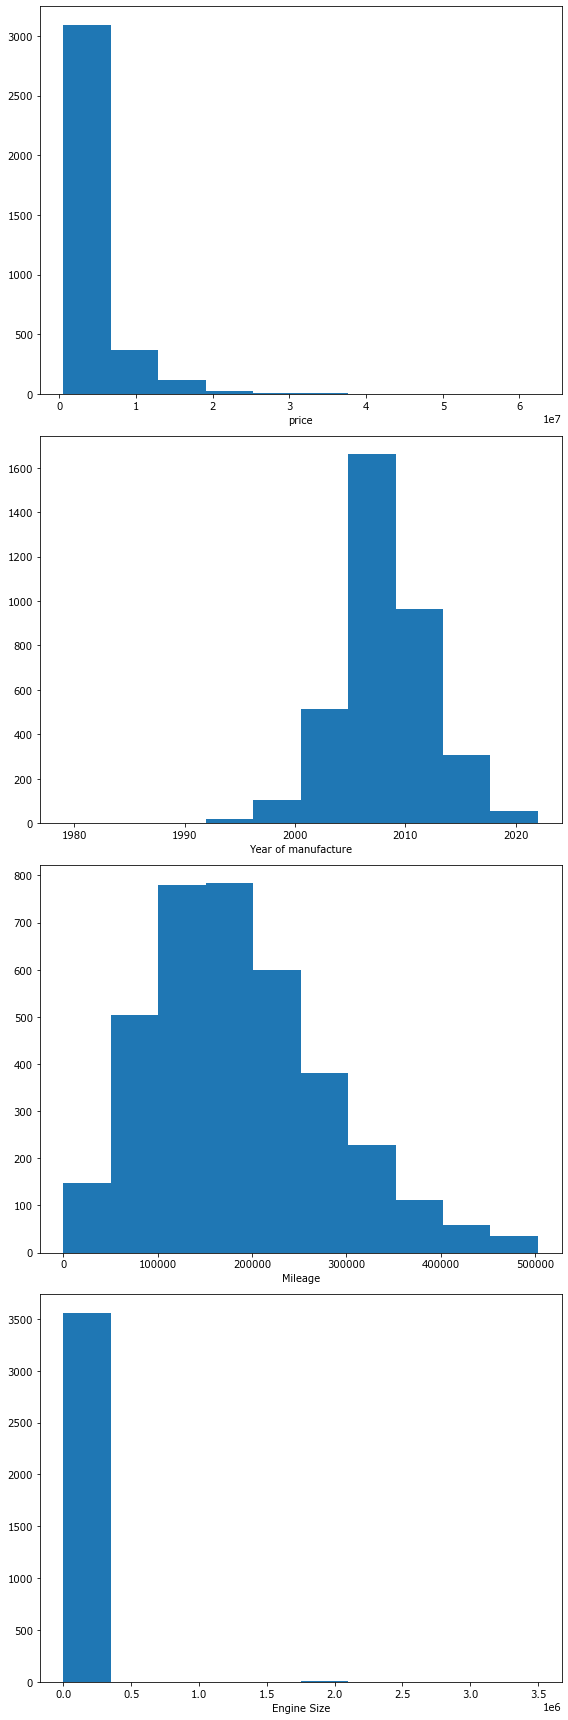

In [67]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

fig, axes = plt.subplots(nrows= len(columns), ncols=1, figsize= (8, 6*len(columns)))

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(copy_data[column])
    ax.set_xlabel(columns[i])
plt.tight_layout()



# Display the plot
plt.show()  

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


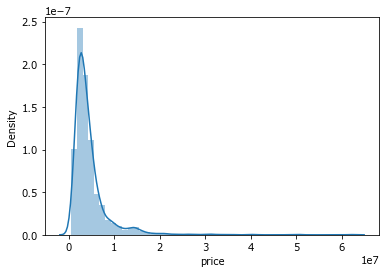

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


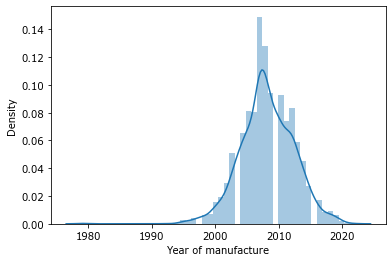

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


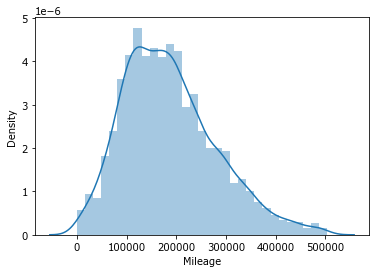

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


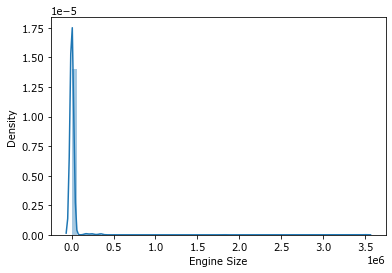

In [68]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

for column in columns:
    sns.distplot(copy_data[column])
    plt.show()  


# Display the plot


### LOG TRANSFORMATION HISTOGRAM


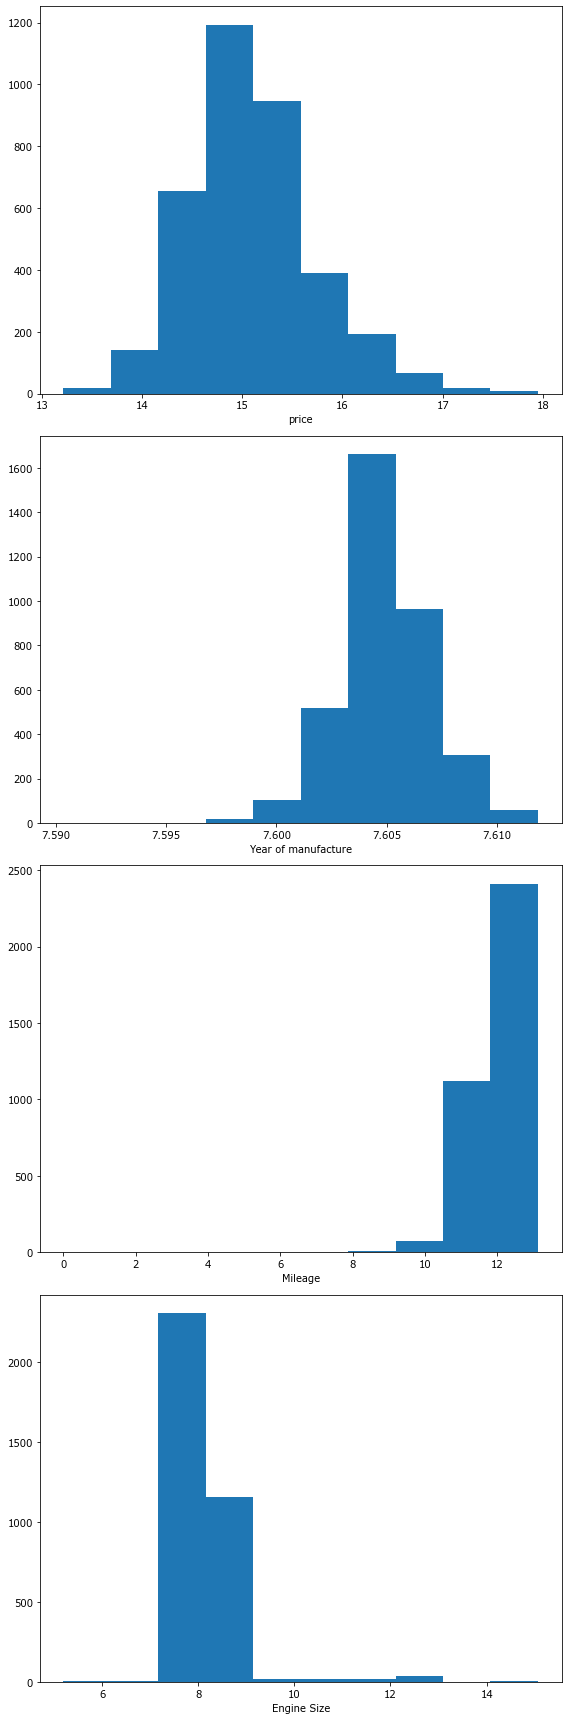

In [69]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

fig, axes = plt.subplots(nrows= len(columns), ncols=1, figsize= (8, 6*len(columns)))

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(np.log(copy_data[column]))
    ax.set_xlabel(columns[i])
plt.tight_layout()



# Display the plot
plt.show()  

###### car-id: this is the id of the car, which i feel wont describebe anything about the car so needs to be removed \n
###### price- That is our target. it does not have any null value and it is an integer
###### fuel_type: It has one missing vlue, which would be removed
###### gear_type: It has one missing vlue, and anobject
###### color- it has 4 missing values, put in the mode values in each one
###### mileage- it has 45 missing values, and it is a flot, so we can fill in with median
###### Engine size- als have 45+ missing values. it can be filled with median
###### car: has a lot of missing value and it is an object
###### trim, drivetrain,seats,number_of_cylinder,horse power, registered city all have a lot of missing values
###### i would remove from car to registered city


###### Log of price transformation
######  Log all numerical data except from mileage

###### Stochastic noise is often not unavoidable. All you have to do is build robost models, and you can use sross validation technique to know if your data is suspectible to noise.   Robust models like decision tree can reduce outliers

###### removing outliers

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


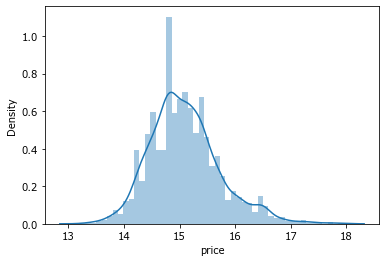

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


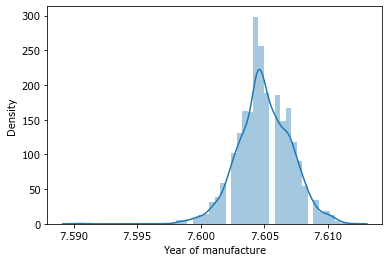

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


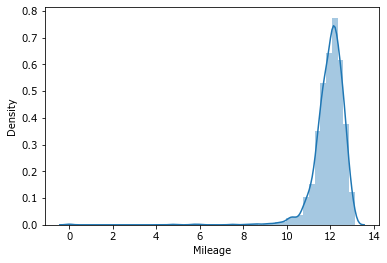

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


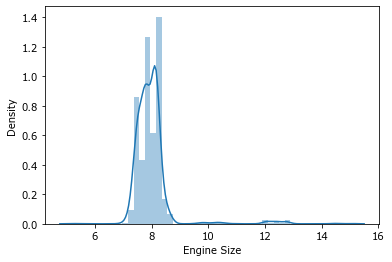

In [70]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

for column in columns:
    sns.distplot(np.log(copy_data[column]))
    plt.show()  


In [71]:
## CORELLATION
numerical_columns = copy_data.select_dtypes(include = ['int64', 'float64'])
correlation_columns = numerical_columns.corr()
print(correlation_columns)

                     price  Year of manufacture  Mileage  Engine Size  Seats  \
price                1.000                0.546   -0.301        0.002  0.088   
Year of manufacture  0.546                1.000   -0.420        0.002 -0.058   
Mileage             -0.301               -0.420    1.000       -0.009  0.008   
Engine Size          0.002                0.002   -0.009        1.000  0.339   
Seats                0.088               -0.058    0.008        0.339  1.000   
Number of Cylinders  0.206               -0.103   -0.004        0.838  0.376   
Horse Power          0.404                0.201   -0.113        0.837  0.313   

                     Number of Cylinders  Horse Power  
price                              0.206        0.404  
Year of manufacture               -0.103        0.201  
Mileage                           -0.004       -0.113  
Engine Size                        0.838        0.837  
Seats                              0.376        0.313  
Number of Cylinders    

In [72]:
## CORELLATION WITH LOG
numerical_columns = copy_data.select_dtypes(include = ['int64', 'float64'])
correlation_columns = np.log(numerical_columns).corr()
print(correlation_columns)

                     price  Year of manufacture  Mileage  Engine Size  Seats  \
price                1.000                0.685   -0.286        0.112  0.065   
Year of manufacture  0.685                1.000   -0.362       -0.025 -0.060   
Mileage             -0.286               -0.362    1.000       -0.007 -0.012   
Engine Size          0.112               -0.025   -0.007        1.000  0.319   
Seats                0.065               -0.060   -0.012        0.319  1.000   
Number of Cylinders  0.223               -0.108    0.012        0.823  0.363   
Horse Power          0.431                0.214   -0.093        0.853  0.310   

                     Number of Cylinders  Horse Power  
price                              0.223        0.431  
Year of manufacture               -0.108        0.214  
Mileage                            0.012       -0.093  
Engine Size                        0.823        0.853  
Seats                              0.363        0.310  
Number of Cylinders    

In [73]:
## remove engine size
## remove seats
## Add power/cylinder
## Log all numerical values

### PREPARING THE DATA

In [74]:
object_columns = car_data.select_dtypes(exclude=['int64', 'float64'])
for column in object_columns:
    print(f"{car_data[column].nunique()}  column {column}")



3120  column car_id
4  column fuel type
3  column gear type
50  column Make
325  column Model
18  column Colour
3  column Condition
3  column Selling Condition
3  column Bought Condition
15  column car
388  column Trim
6  column Drivetrain
71  column Registered city


In [75]:

def fill_in_object_value(column_list, data):
    for column_name in column_list:
        try:
            mode = data[column_name].mode()[0]
            data[column_name].fillna(mode, inplace = True)
        except IndexError:
           continue
    return data
def fill_in_numeric_value(column_list, data):
    for column_name in column_list:

        try:
            mean_value = data[column_name].mean()
            data[column_name].fillna(mean_value, inplace=True) 
             
        except IndexError:
            continue

    
    return data
def remove_column(data, column_list=[]):
    for column in column_list:
        try:
            data.drop(column, axis=1, inplace =True)
        except KeyError:
            continue
    return data
        
def decompose_object(column_name, data):

    data[column_name] = data[column_name].astype(str)

    label_binarizer = LabelBinarizer()
    one_hot_encoded = label_binarizer.fit_transform(data[column_name])

    encoded_columns = [f'encoded_{class_}' for class_ in label_binarizer.classes_]
    df_encoded = pd.DataFrame(one_hot_encoded, columns=encoded_columns)

    df_final = pd.concat([data, df_encoded], axis=1)

    return df_final

def aggregate_features(data ):
    data["power/cylinder"] = data["Horse Power"]/ data["Number of Cylinders"]
    return data


def log_feature(column_list, data):
    for column in column_list:
        data[column] = np.log(data[column])
    return data


def prepare_scale_binarizer (numerical_columns, object_columns, data):
    scaled_column = standard_scaler.fit_transform(numerical_columns)
    scaled_numeric_df = pd.DataFrame(scaled_column, columns = numerical_columns.columns)


    binarized_labels_dfs = []
    for col in object_columns.columns:
        binarized_label = label_binarizer.fit_transform(object_columns[col])
        binarized_labels_df = pd.DataFrame(binarized_label, columns=label_binarizer.classes_)
        binarized_labels_dfs.append(binarized_labels_df)

    concatenated_dataframe = pd.concat([scaled_numeric_df] + binarized_labels_dfs, axis=1)
    return concatenated_dataframe
    


In [76]:
car_details = car_data.copy()
column_to_log = ['price']
car_details = log_feature(column_to_log, car_details)

missing_columns_object = ["fuel type", 'gear type', ]
car_details = fill_in_object_value(missing_columns_object, car_details)


missing_column_numerical = ["Mileage", "Horse Power", "Number of Cylinders"]
car_details = fill_in_numeric_value(missing_column_numerical, car_details)

column_to_drop = ['car_id', 'car', 'Trim','Drivetrain','Seats','Registered city','Engine Size','cylinder/pw]','Model','Make','Colour']
car_details = remove_column(car_details, column_to_drop)


car_details = aggregate_features(car_details)

numerical_columns = car_details.select_dtypes(include= ['int64', 'float64'])
object_columns = car_details.select_dtypes(exclude=['int64', 'float64'])
car_details = prepare_scale_binarizer(numerical_columns, object_columns, car_details)


In [77]:
car_details

,price,Year of manufacture,Mileage,Number of Cylinders,Horse Power,power/cylinder,Diesel,Electric,Hybrid,Petrol,...,Manual,Brand New,Foreign Used,Nigerian Used,Brand new,Imported,Registered,Brand new,Imported,Registered
0,-0.374,-0.986,0.410,0.000,0.000,0.012,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,0.532,-0.272,0.214,0.000,0.000,0.012,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,1.190,0.917,-0.604,1.488,3.137,2.851,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,1.605,0.917,-0.883,0.000,0.000,0.012,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.243,1.154,-0.743,0.000,0.000,0.012,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,-0.972,-1.224,0.634,-2.044,0.000,3.034,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3718,-1.000,-1.462,-0.090,1.488,0.193,-1.189,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3719,-1.775,-1.937,0.284,-2.044,-2.281,-1.661,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3720,-1.638,-1.699,1.090,0.000,0.000,0.012,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1


### MODEL SELECTIIOIN

In [78]:
train_split, test_split = train_test_split(car_details, test_size=0.2, random_state=42)

In [79]:

model_data = train_split.copy()
y_train = model_data["price"]
x_train = model_data.drop('price', axis =1)


In [80]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.inspection import permutation_importance



models = [('sgd',SGDRegressor()),('svm',SVR()),('forest',RandomForestRegressor()),
         ('ada', AdaBoostRegressor()),('bag',BaggingRegressor()),('extree',ExtraTreesRegressor()),
          ('grad',GradientBoostingRegressor())]
          
for i,j in models:
    scores = cross_val_score(j, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
    rmse = np.sqrt(-scores.mean())
    print(i,rmse)

sgd 0.6441682469764864


svm 0.6255496440553103
forest 0.6302133947299129
ada 0.6921502412168618
bag 0.6508394470819114
extree 0.66315001378773
grad 0.609404915466932


In [81]:
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

## Evaluating on test set

In [82]:

test_data= test_split.copy()
y_test = test_data["price"]
x_test = test_data.drop('price', axis =1)

In [83]:
y_pred = model.predict(x_test)
y_test = y_test.values


In [84]:
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)




In [85]:
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse) 
final_rmse

2.6812990388255686

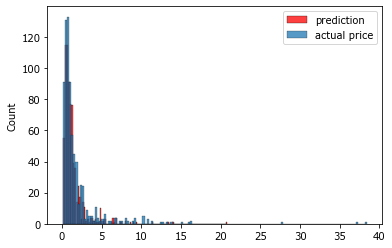

In [86]:
sns.histplot(y_pred, label='prediction',color='red')
sns.histplot(y_test, label='actual price')
plt.legend()

In [88]:
df_pred = pd.DataFrame(y_pred, columns=['Prediction'])
df_pred['Target'] = y_test
df_pred['Difference%'] = np.absolute((df_pred['Target'] - df_pred['Prediction'])/df_pred['Target']*100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_pred = df_pred.sort_values(by=['Difference%'])
df_pred

,Prediction,Target,Difference%
472,1.376,1.377,0.047
545,1.295,1.294,0.070
139,0.608,0.608,0.076
174,0.648,0.647,0.160
192,0.807,0.810,0.442
...,...,...,...
124,1.358,0.276,391.913
510,4.908,0.911,438.869
446,8.945,1.558,474.130
513,2.562,0.401,539.343
